#Quiz
> 다음 사이트에서 데이터를 다운받아 분석하시오
* https://data.seoul.go.kr/dataList/10280/S/2/datasetView.do
1. 여러분이 서울 시장이라고 가정하고 서울 시민의 건강 관리를 위해 운동 공원을 만들려고 한다. 데이터를 분석하여 어디에 만들지 결과를 도출하시오
2. 여러분이 헬스장을 오픈하려 합니다. 성공적으로 헬스장을 운영하기 위한 여러 방안들을 분석하여 운영계획을 수립해 보세요

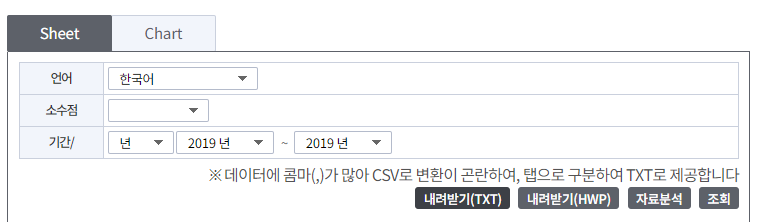

>위의 그림에서 내려받기(TXT)를 클릭하여 분석 파일을 다운 받아 구글 드라이브에 업로드 한다.

#0. 데이터 읽기

#1. 데이터 구조 분석

> info로 데이터 분석 결과 결측치는 없는 것으로 판단된다.

> 위의 데이터를 분석해 보면 "운동을 싫어해서"라고 하는 사람 이외에는 운동을 하고자 하는 의지는 있다고 판단할 수 있다. 

>1번 문제에서 운동공원을 만들기 위해서는 다음 상황에 맞는 위치를 찾는 것이 좋을 듯하다.
* 운동을 할 충분한 시간이 없어서 : 응답이 가장 적은 위치
* 함께 운동을 할 사람이 없어서 : 운동을 하면서 친해질 수도 있으니 배제
* 운동을 할 만한 장소가 없어서 : 응답이 많은 위치 선정
* 운동을 할 충분한 비용이 없어서 : 응답이 많은 위치 선정

> 결론적으로 "운동을 할 만한 장소가 없어서"와 "운동을 할 충분한 비용이 없어서"의 응답이 많은 지역 중 "운동을 할 충분한 시간이 없어서"의 응답이 가장 적은 지역을 찾아 운동 시설을 만들면 될 듯 하다.

#2. 문제 해결을 위한 데이터 정제
> 우선 데이터의 종류를 확인하고 사용할 데이터만 추출할 것이다.
1. 기간 확인 및 중복 제거
2. 대분류 확인 및 중복 제거

##2.1 기간 확인 및 중복 제거

> 기간 확인 결과 2019로 모두 같은 값을 가지고 있다. 따라서 이 부분은 제거한 후 다음 내용을 진행해 보자

##2.2 대분류 확인 및 중복 제거

> 대분류 결과를 보면 다음과 같다.(정확한 내용은 데이터를 중복 제거 후 결과를 확인해야 하지만 데이터가 많지 않아 눈으로 확인 후 정리)
* 서울시 : 전체 정리 내용
* 성별 : 남, 녀를 기준으로 분류한 내용
* 연령별 : 10, 20, 30, 40, 50, 60대이상으로 분류한 내용
* 학력별 : 중,고, 대, 대학원으로 분류한 내용
* 소득별 : 100만원 미만, 100-200만원 미만, 200-300만원 미만, 300-400만원 미만	,	400-500만원 미만	,	500만원 이상	으로 분류
* 혼인상태별 : 기혼, 미혼, 이혼사별기타 로 분류
* 지역대분류 : 도심권	,	동북권, 서북권, 서남권, 동남권 으로 분류

>위의 내용을 제외한 나머지는 구별 분류이다. 이러한 데이터는 독립적 데이터들로 서로에 대한 연관성이 없다. 
* 1번 문제는 "운동 공원을 어느 구에 만들 것인가?"이며 구 이외의 정보는 필요 없다. 
* 2번 문제는 헬스장 위치 및 홍보를 위한 주 고객을 선정해야 함으로 성별, 연령, 구 정보가 필요하다.

>구 정보만 추출하기 위해 isin을 이용하여 대분류에서 구 정보를 제외한 모든 정보를 df_gu에 저장한다. 그리고 대분류 열을 제거한 후 파일에 저장한다.

> 성별로 분류한 파일을 저장한다.

> 연령별로 분류한 파일을 저장한다.

#3. Quiz1 풀기
>여러분이 서울 시장이라고 가정하고 서울 시민의 건강 관리를 위해 운동 공원을 만들려고 한다. 데이터를 분석하여 어디에 만들지 결과를 도출하시오

##3.1 파일 읽기

> 위의 결과 중 우선 순위를 정해야 한다. 우리가 할 것은 운동 공원을 만들 것이다. 따라서 다음과 같은 우선 순위를 정할 수 있다.
1. 운동을 할 만한 장소가 없어서
2. 운동을 할 충분한 비용이 없어서

> 운동할 시간이 없다와 운동을 같이 할 사람이 없다, 그리고 운동이 싫다는 운동 공원를 만든다고 해결될 것이 아님으로 배제하겠다.

##3.2 정렬 및 부분 추출

>우선 순위가 장소가 높음으로 장소를 기준으로 정렬후 분류, 장소, 비용으로 값을 추출한다.

>컬럼명이 너무 길어 간단히 줄여 보았다.

##3.3 종합점수 구하기

> 장소가 없어 운동을 못하는 사람이 많은 구를 우선으로 적용하기 위해 가중치를 주었다. 그렇다고 돈이 없어 운동을 못하는 시민이 있으면 안되기 때문에 비율은 6:4정도로 하여 종합 점수를 산출하고 상위 top5를 추출하였다.

>

##3.4 시각화

>한글 깨짐 현상을 해결하기 위해 위와 같이 처리하였다.


> 이 자료를 이용하여 내부 회의를 통해 운동 공원을 만들 구를 선정하면 된다.

#4. Quiz2
>여러분이 헬스장을 오픈하려 합니다. 성공적으로 헬스장을 운영하기 위한 여러 방안들을 분석하여 운영계획을 수립해 보세요

##4.1 데이터 읽기

> 창업을 위한 분석은 이전에 진행했던 내용과 다르게 생각해야 한다. 우선 배제해야 할 부분은 다음 두 가지 이다.
* 운동을 싫어해서
* 운동을 할 충분한 비용이 없어서

> 나머지 데이터로 우선 순위를 정하면 다음과 같다.
1. 운동을 할 만한 장소가 없어서 : 장소만 있으면 가능
2. 함께 운동을 할 사람이 없어서 : PT로 함께할 사람 연결
3. 운동을 할 충분한 시간이 없어서 : 인근이면 운동 가능할 것으로 판단

> 위의 내용 기반으로 헬스장 위치를 선정해 보자.

##4.2 점수 균등 분포

>이전 문제에서 가중치를 적용하여 종합점수를 산정했다. 하지만 약간의 문제가 있다. 바로 단위가 다르다는 것이다. 위의 내용을 다음과 같이 확인할 수 있다.
* 운동을 할 충분한 시간이 없어서 : 21.3 ~ 69.8
* 함께 운동을 할 사람이 없어서 : 0.4 ~ 13.9
* 운동을 할 만한 장소가 없어서 : 1.2 ~ 9.4

> 위에서 보듯이 각 열별로 범위가 다르기 때문에 가중치를 적용하기 어렵다. 따라서 다음과 같은 수식을 이용하여 100점 기준으로 수치를 변경할 수 있다.
* (x-min)*100 / (max-min)
* x:산출할 데이터, min:바닥값, max:천정값, (max-min):범위

>위와 같이 10점 만점으로 값을 변환할 수 있다. 다른 데이터도 이와 같은 방법으로 수치를 변환한 후 가중치를 적용해 보자

##4.3 특정 열 추출 및 열 이름 변환

> 위와 같이 모든 내용을 10점 만점 기준으로 변환하였다. 그럼 필요한 정보만 다시 추출해 보자

>위와 같이 필요한 열만 추출할 수 있다. 하지만 열 이름이 너무 길어 보기 힘들다. 이를 변경해 보자.

>이전 열 이름 변경 시 값을 지정하여 변경했지만 이번엔 모든 이름을 변경했다.

##4.4 가중치 선정
> 가중치는 다음 순서로 지정할 것이다.
1. 장소없음 : 5
2. 함께할 사람 : 3
3. 시간 부족 : 2

> 위 기준으로 종합 점수를 산출해 보자

>위와 같이 가중치를 적용하고 상위 top5를 산출해 보았다.
* 운동할 곳이 없어 운동을 못하는 경우는 높아야 헬스장이 생기면 사람이 모일 것이다.
* 함께할 사람이 없어 운동을 못하는 경우는 PT로 추가 매출을 유도할 수 있다.
* 시간 부족으로 운동을 못하는 경우는 작을 수록 헬스장에 올 확률이 높다.

> 이를 기반으로 최적의 장소는 동작구 이며 2순위는 은평구 이다. 종로구의 경우 함께할 사람이 0이므로 추가 매출의 어려움이 발생할 수도 있어 배제했다. 양천구의 경우 시간 부족으로 못하는 것이 9가 넘기 때문에 헬스장에 올 확률이 적다. 따라서 다음과 같은 순으로 헬스장을 차리면 좋을 듯하다.
* 동작구 -> 은평구 -> 중구

> 시간 부족이 5 미만이고 함께할 사람의 5초과인 경우로 필터링 하니 이전과 비슷하긴 하지만 3순위가 변경되었다. 3순위였던 중구와 여기서 나타나는 관악구를 선택한다면 지역에 대한 특성도 생각하면서 결정해야 할듯 하다. 중구의 경우 운동 시설이 없어서 못한다는 상황이 많은 반면 관악구의 경우 5.2로 낮은 상황이다. 하지만 중구는 상업구이고 관악구는 생활구이다보니 여러 상황을 고려해서 결정을 해야 한다. 

> 결론은 위의 내용에 중구를 포함하여 고객이 원하는 지역을 선정할 수 있도록 도움을 주면 될 듯하다.

##4.5 운동 시설 구축


>여자가 시간이 많으며 함께할 사람은 많이 찾고 있다. 따라서 여자를 위한 운동 시설을 구축하고 함께 할 수 있는 상황을 만들어 준다. 다음과 같은 내용 위주로 헬스장을 운영하는 것이 좋을 듯하다.
* 줌바댄스
* 요가
* 그룹 PT



##4.6 홍보 방안
> 4.5에서 분석한 성별 내용을 기반으로 홍보를 하는 것이 좋다. 여기에 추가적으로 확인해 봐야 하는 것이 운동 가능한 연령대이다. 이번에는 연령을 분석하여 홍보방안을 제시해 보자

>홍보를 위해서 어떤 연령대를 타겟으로 둘 것인가 생각해 보자. 기준을 두어야 할 정보는 다음 3가지 이다.
* 운동을 할 충분한 시간이 없어서
*	함께 운동을 할 사람이 없어서
*	운동을 할 만한 장소가 없어서

>위의 내용을 그래프로 표현할 것이다. 여기서 운동을 할 충분한 시간이 없어서는 부정적인 대답이므로 100에서 차감한 정보로 그래프를 그릴 것이다.

> 위처럼 apply를 이용하여 값을 차감할 수 있다.

> 다음과 같은 기준으로 홍보를 준비하면 될 듯하다.
* 시간 기준 : 60대이상 -> 50대 -> 20대
* 사람 기준 : 50대 -> 60대 이상 -> 30대
* 장소 기준 : 60대 이상 -> 50대 -> 20대

> PT에 대한 추천은 30, 50, 60대 이상 기준으로 진행하면 좋을 것으로 예상된다.
또한 50대를 기준으로 홍보전단지를 만들면 좋을 듯하다.
